In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import scipy as sp
pd.set_option('display.width',500)
pd.set_option('display.max_columns',200)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]

In [3]:
from matplotlib.colors import ListedColormap
cm_bright =ListedColormap(['#FF0000', '#0000FF'])

In [4]:
CreditClient = pd.read_excel("default_ credit_clients.xls", header=1)
C=CreditClient
C=CreditClient.rename(columns={"default payment next month":"Y"})

In [5]:
C.isnull().values.any()

False

In [6]:
C_X =C.drop(['ID','Y'], axis=1)

In [7]:
C_X.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000


## We removed extra features and tried to get maximized accuracy

In [8]:
C_XX = C_X.drop(['BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT4','PAY_AMT3','PAY_AMT2','PAY_AMT5','PAY_AMT6','LIMIT_BAL'
                 ,'PAY_5','PAY_6','PAY_4','PAY_3'], axis=1)

In [9]:
from sklearn.cross_validation import KFold, train_test_split
from sklearn.metrics import accuracy_score
def cv_score(clf,x,y,score=accuracy_score):
        result=0
        nfold=5
        for train,test in KFold(y.size,nfold):
            clf.fit(x[train],y[train])
            result += score(clf.predict(x[test]),y[test])
        return result/nfold

In [10]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(C_XX.values,C['Y'].values, random_state=0)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()
score =cv_score(clf,Xtrain,Ytrain)
score

0.75226666666666664

## We saw that model is not giving good accuracy. Hence will do cross-validation and will find best neighbors

In [12]:
Cs= [10,20,30,40,50,60,70,80]
max_score=0
for c in Cs:
    clf1 = KNeighborsClassifier(n_neighbors=c)
    score_n= cv_score(clf1,Xtrain,Ytrain)
    
    if score_n > max_score:
        max_score =score_n
        best_C =c
print (max_score, best_C)
        

0.781066666667 30


In [13]:
clf2= KNeighborsClassifier(n_neighbors=best_C)
clf2.fit(Xtrain,Ytrain)
Ypred =clf2.predict(Xtest)
print (accuracy_score(Ytest,Ypred))

0.786533333333


## Plotting ROC curve


In [14]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(Ytest,Ypred)
roc_auc = metrics.auc(fpr, tpr)

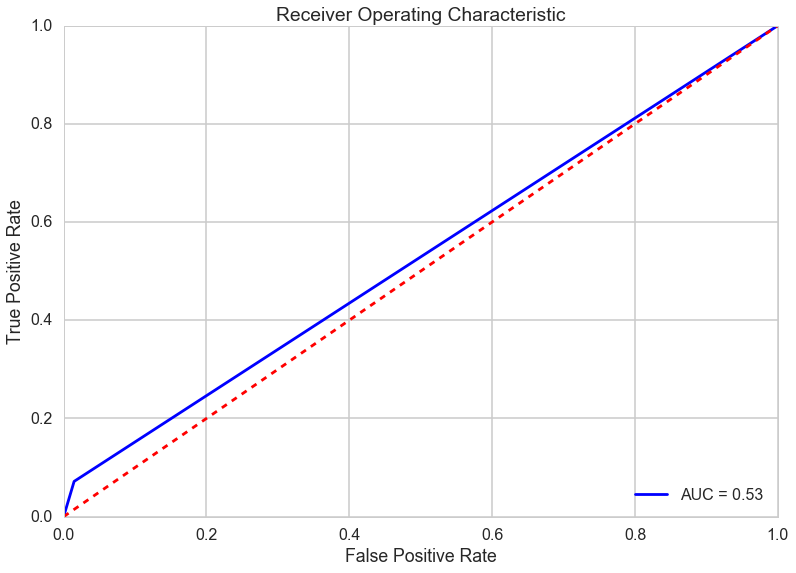

In [15]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()